# Health Analysis for 2020

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
cols = ['MomentType','Measurement','Unit','Timestamp',
        'MedName','Type','Note','Tags','Location','TimeZone','ExcelTimestamp']

onedrop = pd.DataFrame(columns=cols)
for i in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    onedrop = pd.concat([onedrop, pd.read_csv(f'./data/onedrop_2020-{i}.csv')])

In [3]:
onedrop.shape

(2468, 11)

In [4]:
onedrop.head()

,MomentType,Measurement,Unit,Timestamp,MedName,Type,Note,Tags,Location,TimeZone,ExcelTimestamp
0,Medication,10.000000,mg,2020-01-31 19:00:00.0,Lisinopril (Generic),Other,NaN,NaN,NaN,NaN,1580526000000
1,Medication,1000.000000,mg,2020-01-31 19:00:00.0,Metformin (generic),Pill,NaN,NaN,NaN,NaN,1580526000000
2,Blood Glucose,118.000000,mg/dL,2020-01-31 14:51:03.0,NaN,NaN,NaN,NaN,NaN,NaN,1580511063000
3,Activity,10.809000,minutes,2020-01-31 14:10:48.584,NaN,NaN,Data from Google Fit: 596 steps,NaN,NaN,NaN,1580508648584
4,Activity,3.543617,minutes,2020-01-31 12:33:09.227,NaN,NaN,Data from Google Fit: 269 steps,NaN,NaN,NaN,1580502789227


In [5]:
glucose = onedrop[onedrop['MomentType'] == 'Blood Glucose']
glucose = glucose.set_index(pd.to_datetime(glucose['Timestamp']))
glucose = glucose.rename({'Measurement':'Glucose'}, axis=1)

In [6]:
glucose.head()

,MomentType,Glucose,Unit,Timestamp,MedName,Type,Note,Tags,Location,TimeZone,ExcelTimestamp
Timestamp,,,,,,,,,,,
2020-01-31 14:51:03,Blood Glucose,118.0,mg/dL,2020-01-31 14:51:03.0,NaN,NaN,NaN,NaN,NaN,NaN,1580511063000
2020-01-31 07:21:12,Blood Glucose,148.0,mg/dL,2020-01-31 07:21:12.0,NaN,NaN,NaN,NaN,NaN,NaN,1580484072000
2020-01-30 18:58:49,Blood Glucose,117.0,mg/dL,2020-01-30 18:58:49.0,NaN,NaN,NaN,NaN,NaN,America/Los_Angeles,1580439529000
2020-01-30 08:04:56,Blood Glucose,135.0,mg/dL,2020-01-30 08:04:56.0,NaN,NaN,NaN,NaN,NaN,America/Los_Angeles,1580400296000
2020-01-29 17:35:27,Blood Glucose,108.0,mg/dL,2020-01-29 17:35:27.0,NaN,NaN,NaN,NaN,NaN,NaN,1580348127000


In [7]:
glucose_daily_avg = glucose['Glucose'].resample('D').mean()

In [8]:
glucose_weekly_avg = glucose['Glucose'].resample('W').mean()

In [9]:
glucose_monthly_avg = glucose['Glucose'].resample('M').mean()

/home/jonathan/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


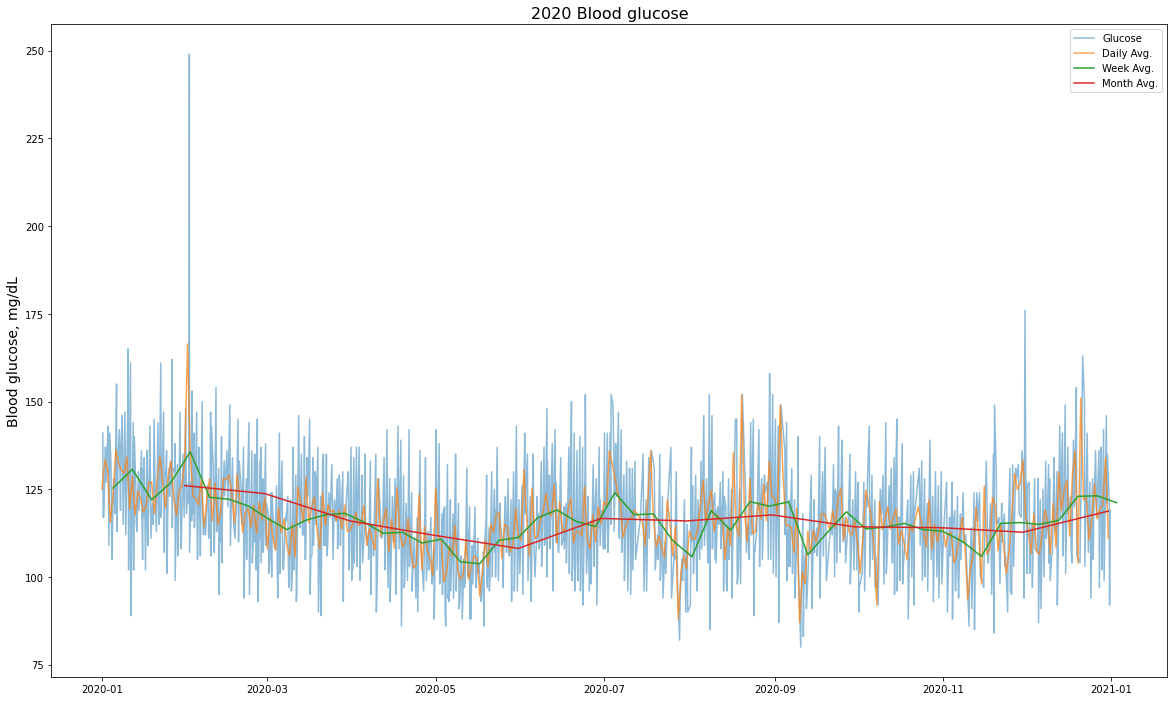

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=glucose['Glucose'], ax=ax, label='Glucose', alpha=0.5)
sns.lineplot(data=glucose_daily_avg, ax=ax, label='Daily Avg.', alpha=0.7)
sns.lineplot(data=glucose_weekly_avg, ax=ax, label='Week Avg.')
sns.lineplot(data=glucose_monthly_avg, ax=ax, label='Month Avg.')
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Blood glucose, mg/dL', fontsize=14)
ax.set_title('2020 Blood glucose', fontsize=16)
plt.show()

In [11]:
glucose_daily_avg = glucose_daily_avg.asfreq('D').fillna(glucose_daily_avg.mean())

In [12]:
ets = seasonal_decompose(glucose_daily_avg, model='additive')

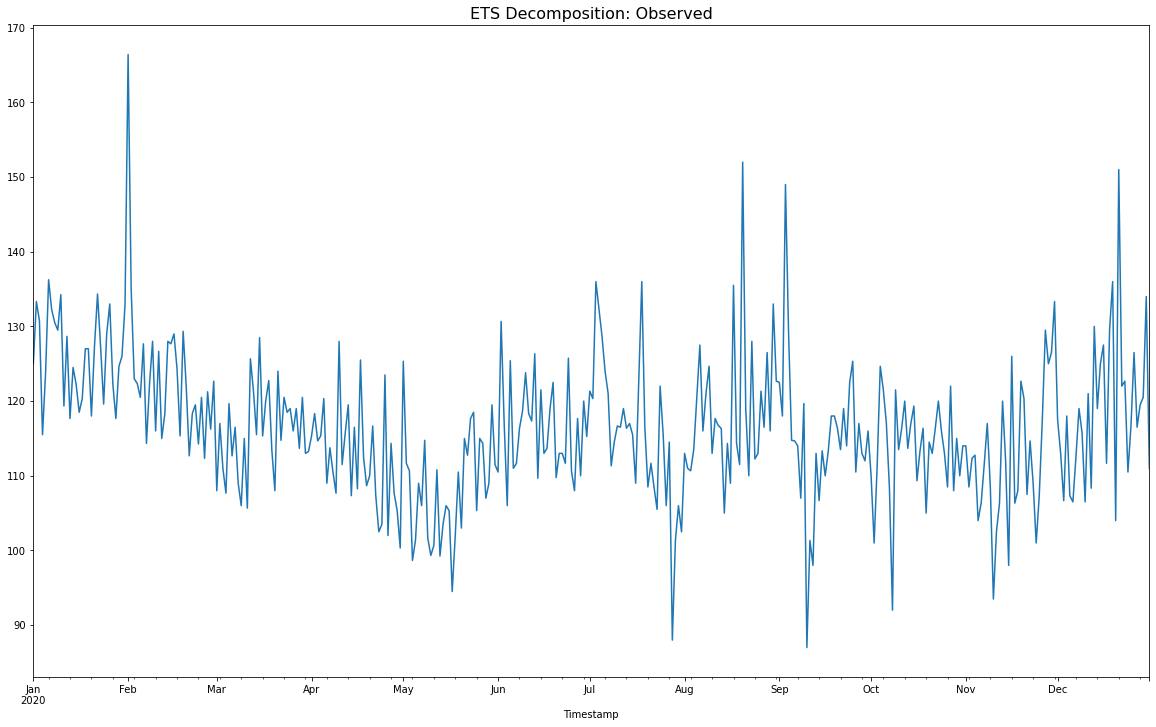

In [19]:
ets.observed.plot(figsize=(20,12))
plt.title('ETS Decomposition: Observed', fontsize=16)
plt.show()

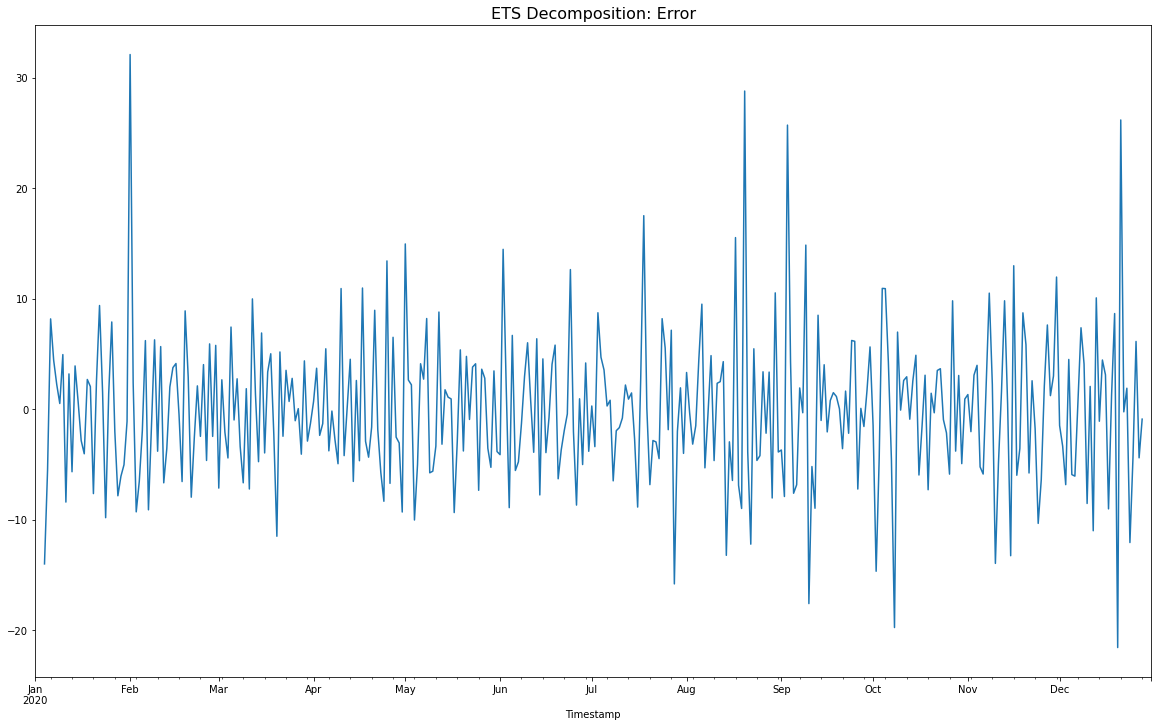

In [20]:
ets.resid.plot(figsize=(20,12))
plt.title('ETS Decomposition: Error', fontsize=16)
plt.show()

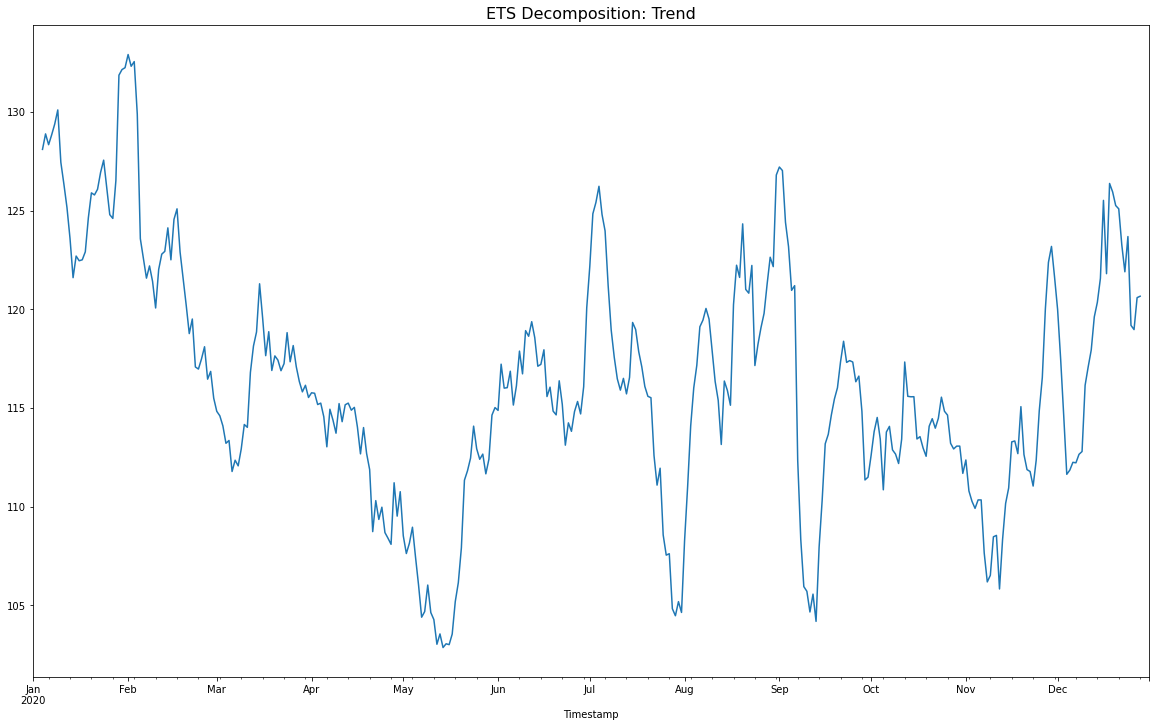

In [21]:
ets.trend.plot(figsize=(20,12))
plt.title('ETS Decomposition: Trend', fontsize=16)
plt.show()

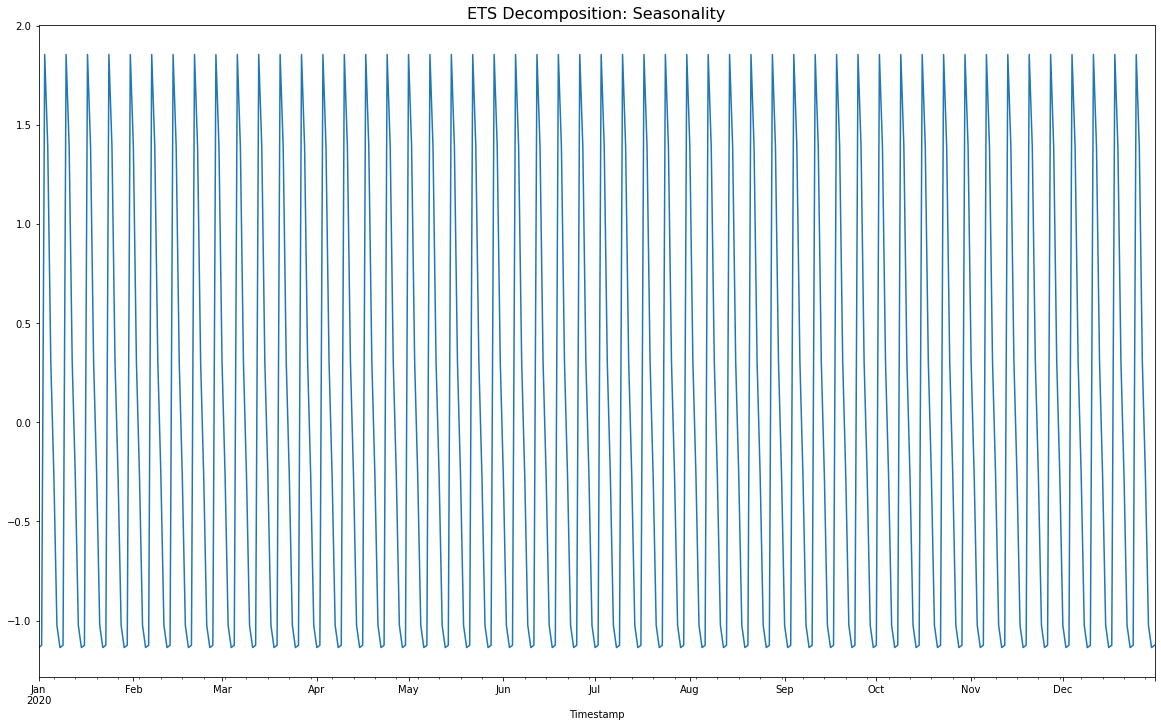

In [22]:
ets.seasonal.plot(figsize=(20,12))
plt.title('ETS Decomposition: Seasonality', fontsize=16)
plt.show()